In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
sns.set(style="white", color_codes=True)

# Loading Data

In [3]:
# Attribute Information:

# 1. L-CORE (patient's internal temperature in C):
# high (> 37), mid (>= 36 and <= 37), low (< 36)
# 2. L-SURF (patient's surface temperature in C):
# high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
# 3. L-O2 (oxygen saturation in %):
# excellent (>= 98), good (>= 90 and < 98),
# fair (>= 80 and < 90), poor (< 80)
# 4. L-BP (last measurement of blood pressure):
# high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
# 5. SURF-STBL (stability of patient's surface temperature):
# stable, mod-stable, unstable
# 6. CORE-STBL (stability of patient's core temperature)
# stable, mod-stable, unstable
# 7. BP-STBL (stability of patient's blood pressure)
# stable, mod-stable, unstable
# 8. COMFORT (patient's perceived comfort at discharge, measured as
# an integer between 0 and 20)
# 9. decision ADM-DECS (discharge decision):
# I (patient sent to Intensive Care Unit),
# S (patient prepared to go home),
# A (patient sent to general hospital floor)

data=pd.concat([pd.read_csv('post-operative.csv', sep=",", header = None)])
data.columns = ["L-core", "L-SURF", "L-O2", "L-BP.","SURF-STBL","CORE-STBL","BP-STBL ","COMFORT","decision"]


# Encoding class labels


In [5]:
# We need every data to be as numbers in sklearn and any other statistical processing we need to perfom.
# therefore we have to encode the categorical values and class lables into numbers.

X = data[["L-core", "L-SURF", "L-O2", "L-BP.","SURF-STBL","CORE-STBL","BP-STBL ","COMFORT","decision"]].values
class_le = LabelEncoder()
data['decision'] = class_le.fit_transform(data['decision'].values)


 # Mapping ordinal features

In [6]:
# for Ordinar features like L-Core, L-Surf, and L-BP that are introduced in three level we need to define the mapping 
# manually as follows.
level_mapping = {'high': 3,'mid': 2,'low': 1}
data['L-core']= data['L-core'].map(level_mapping)
data['L-SURF']= data['L-SURF'].map(level_mapping)
data['L-BP.']= data['L-BP.'].map(level_mapping)

qual_mapping = {'excellent': 2,'good': 1}
data['L-O2']= data['L-O2'].map(qual_mapping)


# One-hot encoding on nominal data

In [7]:
# for three features of SURF-STBL, CORE-STBL, and BP-STBL that are nominal features we need to make one-hot encoding 
# Since all features in this problem are categorical, the preprocessing step is done. In the case that we have other 
# numerical features we need to do other type of preprocessing such as standardization.
X = data[["L-core", "L-SURF", "L-O2", "L-BP.","SURF-STBL","CORE-STBL","BP-STBL ","COMFORT","decision"]].values
STBL_le = LabelEncoder()
X[:, 4] = STBL_le.fit_transform(X[:, 4])
X[:, 5] = STBL_le.fit_transform(X[:, 5])
X[:, 6] = STBL_le.fit_transform(X[:, 6])

ohe = OneHotEncoder(categorical_features=[4])
ohe.fit_transform(X).toarray()
pd.get_dummies(data[["L-core", "L-SURF", "L-O2", "L-BP.","SURF-STBL","CORE-STBL","BP-STBL ","COMFORT","decision"]])

,L-core,L-SURF,L-O2,L-BP.,COMFORT,decision,SURF-STBL_stable,SURF-STBL_unstable,CORE-STBL_mod-stable,CORE-STBL_stable,CORE-STBL_unstable,BP-STBL _mod-stable,BP-STBL _stable,BP-STBL _unstable
0,2,1,2,2,15,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,3,2,3,10,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1,2,3,10,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2,1,1,3,15,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2,2,2,3,10,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,3,1,1,2,15,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,2,1,2,3,5,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,3,2,2,2,10,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,2,3,1,2,10,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,2,1,2,2,10,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


# visualization plots

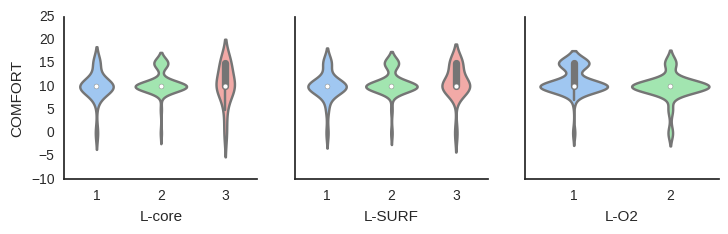

In [8]:
# Violinplots shows the relashion between Comfort with the other features.
g = sns.PairGrid(data,
                 x_vars=["L-core", "L-SURF", "L-O2"],
                 y_vars=["COMFORT"],
                 )
g.map(sns.violinplot, palette="pastel");

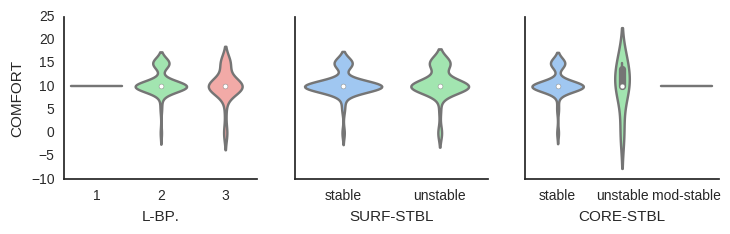

In [9]:
g = sns.PairGrid(data,
                 x_vars=["L-BP.","SURF-STBL","CORE-STBL"],
                 y_vars=["COMFORT"],
                 )
g.map(sns.violinplot, palette="pastel");

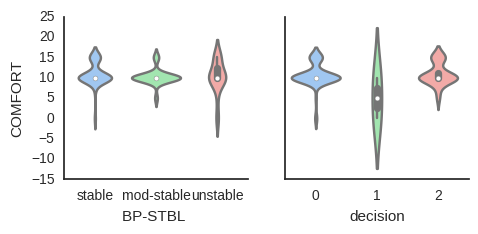

In [10]:
g = sns.PairGrid(data,
                 x_vars=["BP-STBL ","decision"],
                 y_vars=["COMFORT"],
                 )
g.map(sns.violinplot, palette="pastel");

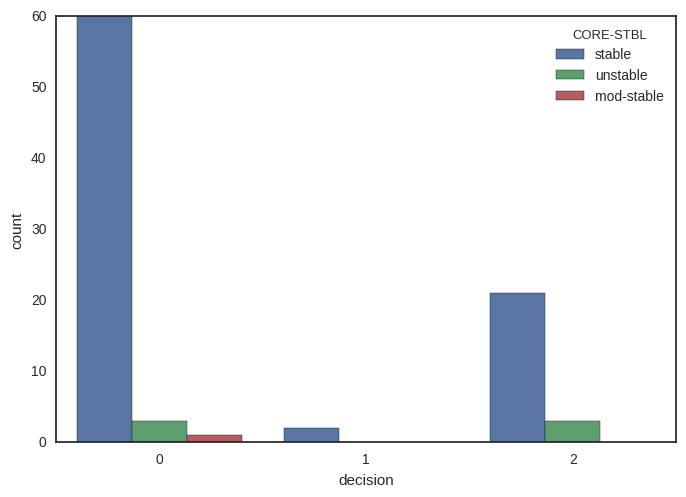

In [114]:
ax = sns.countplot(x="decision", hue="CORE-STBL", data=data)

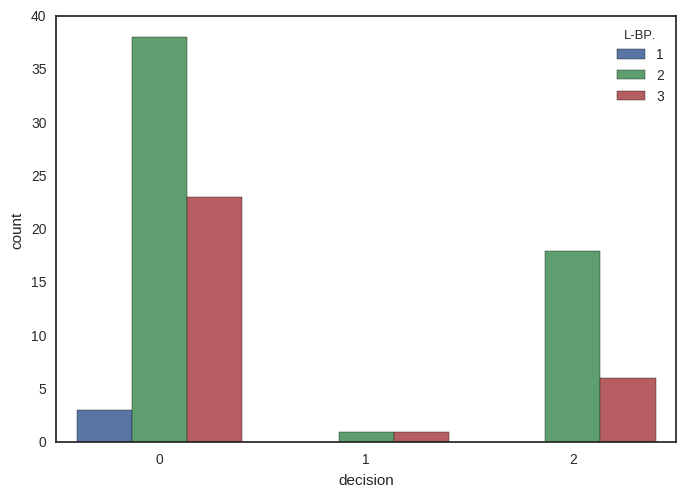

In [8]:
ax = sns.countplot(x="decision", hue="L-BP.", data=data)

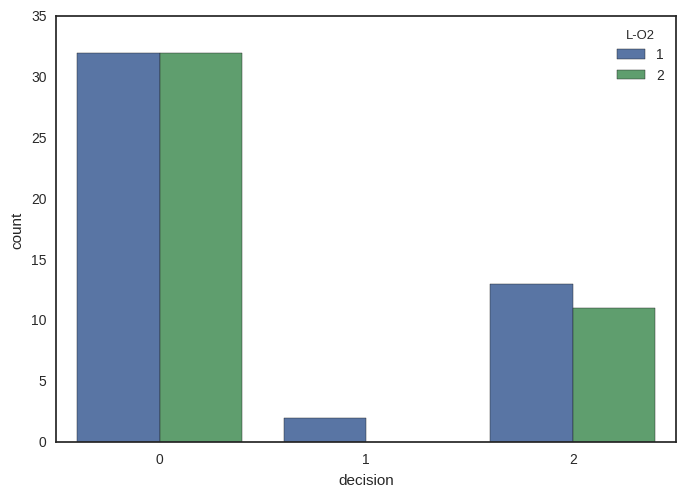

In [9]:
ax = sns.countplot(x="decision", hue="L-O2", data=data)